In [1]:
# Importing my libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import sidetable


This code df = pd.read_csv("fatal_death.csv") will read a CSV file into a Pandas DataFrame. 
Then displays the first five rows of the DataFrame : df.head()

File I will be using is dated from 2015 to 2021 inclusive.

In [2]:
df = pd.read_csv("fatal_death.csv")

df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,4,Lewis Lee Lembke,02/01/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
1,3,Tim Elliot,02/01/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
2,5,John Paul Quintero,03/01/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,11,Kenneth Joe Brown,04/01/2015,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True
4,8,Matthew Hoffman,04/01/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True


In [3]:
print("Dataset has {}".format(df.shape[0]),
"rows and {}".format(df.shape[1]), "columns")

Dataset has 6996 rows and 17 columns


df.columns is a line of code that returns a list of column names in a Pandas DataFrame df.
The column names are important as they provide context and meaning to the data in each column. By accessing the column names using df.columns, I can inspect and manipulate the column names or select specific columns for analysis or visualization.I can also use this attribute to check if the column names have been correctly imported from the CSV file or to rename columns if needed.

In [4]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

The information provided by df.info() is useful for understanding the structure and content of the DataFrame. It can help identify any missing or null values, inconsistencies in data types, and potential issues with memory usage. This information can also guide data cleaning and preprocessing steps before conducting any analysis or modeling on the data.
In next step I'm using this information to drop sensitive data like name of our victims.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6996 entries, 0 to 6995
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6996 non-null   int64  
 1   name                     6693 non-null   object 
 2   date                     6996 non-null   object 
 3   manner_of_death          6996 non-null   object 
 4   armed                    6789 non-null   object 
 5   age                      6640 non-null   float64
 6   gender                   6992 non-null   object 
 7   race                     6047 non-null   object 
 8   city                     6996 non-null   object 
 9   state                    6996 non-null   object 
 10  signs_of_mental_illness  6996 non-null   bool   
 11  threat_level             6996 non-null   object 
 12  flee                     6420 non-null   object 
 13  body_camera              6996 non-null   bool   
 14  longitude               

The names are too personal to use that's the reason I will drop it in my next step.
 The id column is reduntant and will be deleted too. 

In [6]:
df.drop(['id','name'], axis=1, inplace=True)

Checking if my columns: id , name were dropped properly without any errors or issues.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6996 entries, 0 to 6995
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     6996 non-null   object 
 1   manner_of_death          6996 non-null   object 
 2   armed                    6789 non-null   object 
 3   age                      6640 non-null   float64
 4   gender                   6992 non-null   object 
 5   race                     6047 non-null   object 
 6   city                     6996 non-null   object 
 7   state                    6996 non-null   object 
 8   signs_of_mental_illness  6996 non-null   bool   
 9   threat_level             6996 non-null   object 
 10  flee                     6420 non-null   object 
 11  body_camera              6996 non-null   bool   
 12  longitude                6416 non-null   float64
 13  latitude                 6416 non-null   float64
 14  is_geocoding_exact      

Displaying the first few rows of a DataFrame is useful for quickly inspecting the data to get an idea of its structure and contents. It can help identify any issues with data formatting or data entry, as well as provide insight into the range and distribution of the data.

In [8]:
df.head()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,02/01/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
1,02/01/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
2,03/01/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,04/01/2015,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True
4,04/01/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True


The result of df.isna().sum() shows the number of missing values for each column in the DataFrame. This information can help identify potential issues with the data, such as incomplete data or missing information that needs to be addressed before any further analysis or modeling can be conducted.

In [9]:
df.isna().sum()

date                         0
manner_of_death              0
armed                      207
age                        356
gender                       4
race                       949
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       576
body_camera                  0
longitude                  580
latitude                   580
is_geocoding_exact           0
dtype: int64

The df.flee.value_counts() shows the count of each unique value in the "flee" column of the DataFrame, with the most common value listed first. This information can help identify patterns or trends in the data related to whether the victim attempted to flee the scene before the fatal death. This is really useful information to fill my missing values in my column which I will use in my next step.

In [10]:
df.flee.value_counts()

Not fleeing    4123
Car            1142
Foot            893
Other           262
Name: flee, dtype: int64

The action of “not fleeing” dominates “flee” column. I can fill in the missing values with “not fleeing”. 
Please note that this is not a strict rule for handling missing values.
You can choose a different way to handle them (for example drop them)

In [11]:
df.flee.fillna('Not fleeing', inplace=True)

The code df.armed.value_counts() returns a pandas Series object that lists the unique values in the "armed" column of the DataFrame and the frequency with which they occur. This will be useful in understanding the distribution of  how our deceased person was armed or was NOT armed at all.

In [12]:
df.armed.value_counts()

gun                    4016
knife                  1008
unarmed                 434
vehicle                 244
toy weapon              234
                       ... 
fireworks                 1
pen                       1
chainsaw                  1
gun and sword             1
claimed to be armed       1
Name: armed, Length: 97, dtype: int64

“Gun” is the most frequent value so I will use that to fill my missing values. 

df.armed.fillna(df.armed.value_counts().index[0], inplace=True) 
fills any missing or NaN values in the "armed" column of the DataFrame with the most frequent value in that column. This can be useful in ensuring that the data is complete and can be used for subsequent analyses. The inplace=True argument specifies that the original DataFrame is modified rather than creating a new copy of the DataFrame.

In [13]:
df.armed.fillna(df.armed.value_counts().index[0], inplace=True)

The code:

median_age = df["age"].median() 

df["age"] = df["age"].fillna(median_age)

calculates the median age of victims in the "age" column of the DataFrame, fills any missing values in that column with the median age, and assigns the new DataFrame with the filled missing values back to the original "age" column of the DataFrame

In [14]:
median_age = df["age"].median() 
df["age"] = df["age"].fillna(median_age) 

 df.dropna(axis=0, how='any', inplace=True) 
 
 drops any rows in the DataFrame that contain missing or NaN values, modifies the original DataFrame in place, and then reports the total number of missing or NaN values remaining in the DataFrame( I was focus specifically on race,gender,age because they describe the person being shot and thus it could be misleading to make assumption without accurate information.)

 print("There are {}".format(df.isna().sum().sum()), "missing values left in the dataframe")



In [15]:
df.dropna(axis=0, how='any', inplace=True)
print("There are {}".format(df.isna().sum().sum()), "missing values left in the dataframe")

There are 0 missing values left in the dataframe


In [16]:
df.dtypes

date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

The categorical variables can be represented with “object” or “category” data type. 
The age can be represented with “integer” or “float” data types and true/false type of data is handled with boolean. 
All of the data types seem appropriate except for date column.
I will convert it to datetime which is the data type of pandas to handle dates. 
After converting, I will extract “year” and “month” from the date and create new columns.
I can use them to see yearly or monthly shooting rates.

In [17]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month

C:\Users\Maciej JAROS\AppData\Local\Temp\ipykernel_4580\3432093400.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


In [18]:
df.head()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month
0,2015-02-01,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,2
1,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,2
2,2015-03-01,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,3
3,2015-04-01,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True,2015,4
4,2015-04-01,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,4


First I create a new DataFrame df_date that contains the number of incidents that occurred on each date, sorted by date in ascending order. This can be useful for understanding patterns or trends in the frequency of incidents over time. The df_date.rename(columns={'armed':'count'}, inplace=True) code renames the "armed" column to "count" to make it clearer that the values in that column represent the number of incidents.

In [19]:
df_date = df[['date','armed']].groupby('date').count().sort_values(by='date')
df_date.rename(columns={'armed':'count'}, inplace=True)
df_date

,count
date,
2015-01-03,3
2015-01-04,2
2015-01-06,1
2015-01-07,2
2015-01-08,1
...,...
2021-12-07,1
2021-12-09,1
2021-12-10,2


sns.lineplot(x=df_date.index, y='count', data=df_date) creates a line plot using seaborn's lineplot function. The x parameter is set to the index of the df_date DataFrame, which contains the dates on which incidents occurred. The y parameter is set to the name of the column containing the counts of incidents on each date (which was renamed to "count" in the previous step). The data parameter is set to df_date, which specifies the DataFrame to use for the plot.


<AxesSubplot: title={'center': 'Daily Fatal Shootings'}, xlabel='date', ylabel='count'>

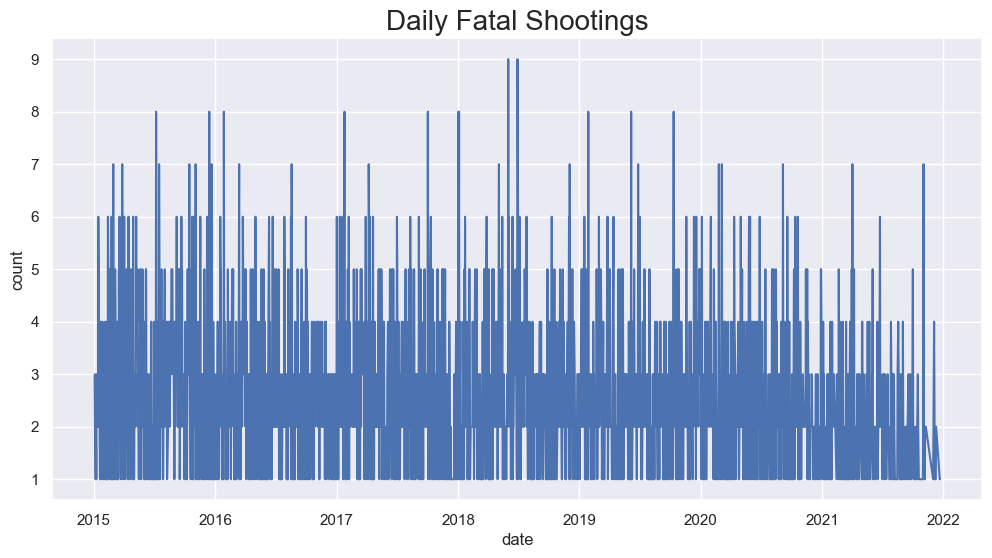

In [20]:
plt.figure(figsize=(12,6))
plt.title('Daily Fatal Shootings', fontsize=20)
sns.lineplot(x=df_date.index, y='count', data=df_date)

This does not tell me much becauase of the amount of data. It will look better if we plot 14-day average frequency graph.

.resample('14D') is a method of the DataFrame that resamples the data in the DataFrame based on a specified time frequency. In this case, it resamples the data to a 14-day frequency.

.mean() is a method of the DataFrame that calculates the mean of each resampled period.

.plot(figsize=(12,6)) is a method of the DataFrame that creates a line plot of the resampled data. figsize=(12,6) sets the size of the figure that will be created.

plt.title('Fatal Shootings - 14 days average', fontsize=15) is a function from the matplotlib library that sets the title of the plot to "Fatal Shootings - 14 days average" with a font size of 15.

Overall, the code df_date.resample('14D').mean().plot(figsize=(12,6)) plt.title('Fatal Shootings - 14 days average', fontsize=15) creates a line plot that shows the 14-day moving average of the mean values of the original DataFrame. 

Text(0.5, 1.0, 'Fatal Shootings - 14 day average')

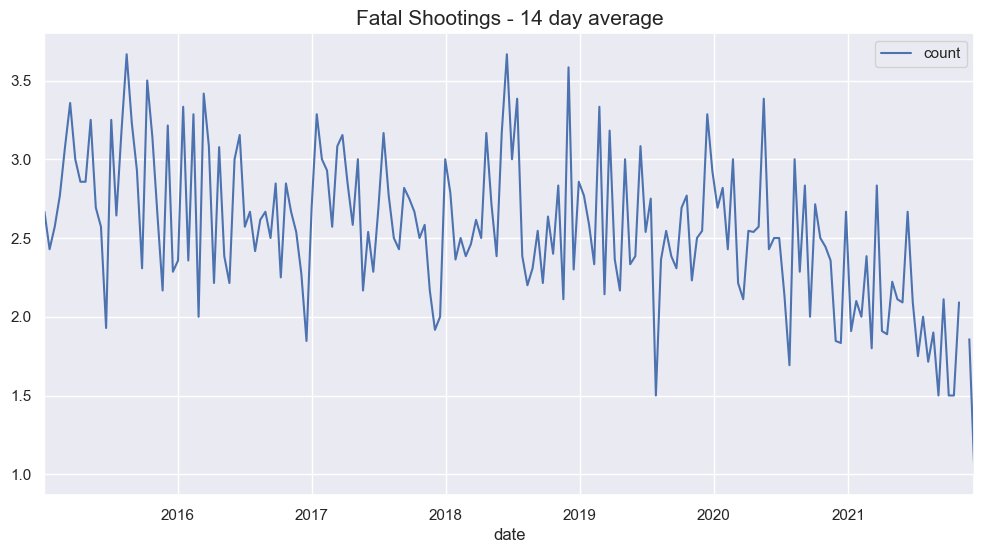

In [21]:
df_date.resample('14D').mean().plot(figsize=(12,6))
plt.title('Fatal Shootings - 14 day average', fontsize=15)

This graph is much more clearer and easily readable. We can observe some peaks but there is not a continuous trend, in the fatal shootings.

df is a pandas DataFrame.

The stb module is a part of the pandas-utilities library, which provides some useful extensions to pandas for data exploration and analysis. df.stb.freq() is a method provided by the stb module.

stb.freq() takes a list of column names as input, and computes the frequency of each unique value in the specified column(s). In my case, the list contains a single string, 'state'.
df.stb.freq(['state']) returns a DataFrame with three columns: the specified column(s) ('state'), the frequency of each unique value in that column, and the percentage of total values that each unique value represents. The rows are sorted in descending order by frequency.

.head(3) is then used to limit the output to the first three rows of the resulting DataFrame.

All together this line of code df.stb.freq(['state']).head(3) computes the frequency of each unique value in the 'state' column of the DataFrame df, and returns a DataFrame with the top three most frequent values in the 'state' column, along with their respective counts and percentages.

In [22]:
df.stb.freq(['state']).head(3)

,state,count,percent,cumulative_count,cumulative_percent
0,CA,823,14.520113,823,14.520113
1,TX,494,8.715596,1317,23.235709
2,FL,388,6.845448,1705,30.081157


The top 3 states in terms of the total number of shootings are CA(823), TX(494), and FL(388).

 The 'count' column represents the number of times each unique value appears in the 'state' column, while the 'cumulative count' column represents the number of times each unique value and all values that appear before it in the sorted list of unique values appear in the 'state' column.

For example, if the 'count' column shows that the value 'Texas' appears 100 times in the 'state' column, and the 'cumulative count' column shows that the value 'Texas' has a cumulative count of 500, this means that there are 400 other unique values in the 'state' column that appear before 'California' in the sorted list of unique values, and together these values appear 400 times.

In other words, the 'cumulative count' column shows the running total of the 'count' column, where each row's value is the sum of the count of that row and all rows before it in the sorted list of unique values. This means that the values in the 'cumulative count' column will always be greater than or equal to the values in the 'count' column, since they include the count of all previous unique values as well.

This code generates a histogram of the age distribution of the individuals who died in police shootings using the matplotlib and seaborn visualization libraries.

Here's a step by step approach:

plt.figure(figsize=(12,8)) creates a new figure with a specified size of 12 inches by 8 inches.

plt.title('Age Distribution of Deaths', fontsize=15) adds a title to the plot with a specified font size.

sns.distplot(df.age) plots a histogram of the values in the age column of the pandas DataFrame df. The distplot() function from the seaborn library is used to create the histogram, which is overlaid with a density curve that represents the estimated probability density function of the data.

The resulting plot shows the distribution of ages for individuals who died in police shootings, with the x-axis representing the age range and the y-axis representing the density/frequency of occurrences at each age.

C:\Users\Maciej JAROS\AppData\Local\Temp\ipykernel_4580\809720238.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<AxesSubplot: title={'center': 'Age Distribution of Deaths'}, xlabel='age', ylabel='Density'>

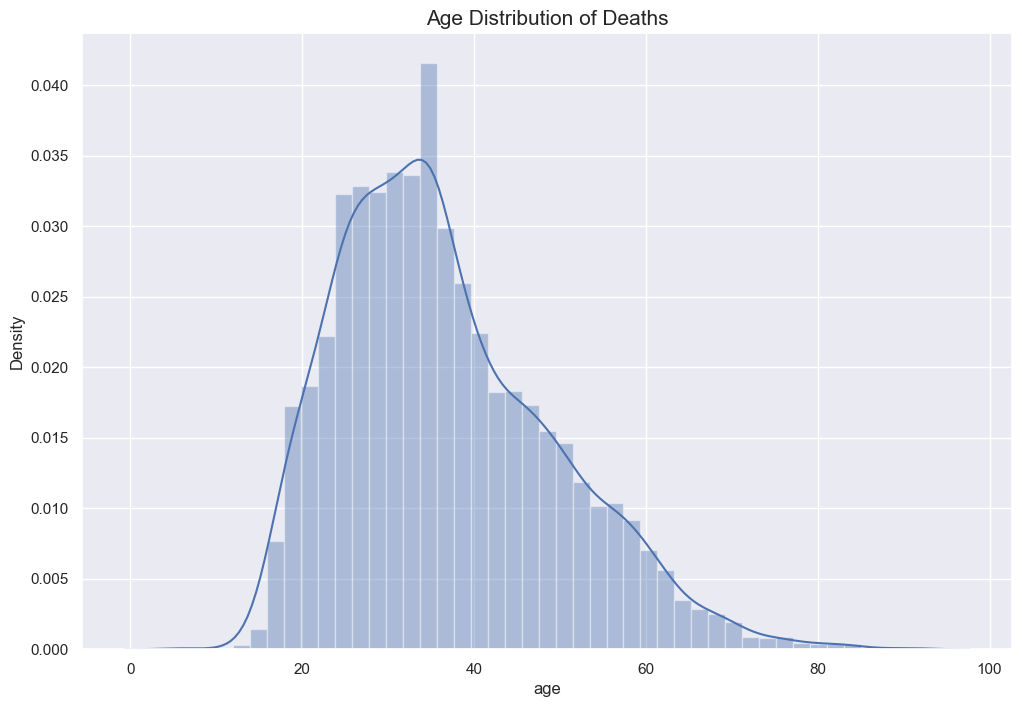

In [23]:
plt.figure(figsize=(12,8))
plt.title('Age Distribution of Deaths', fontsize=15)
sns.distplot(df.age)


<AxesSubplot: title={'center': 'Age Distribution of Deaths'}, xlabel='age', ylabel='Count'>

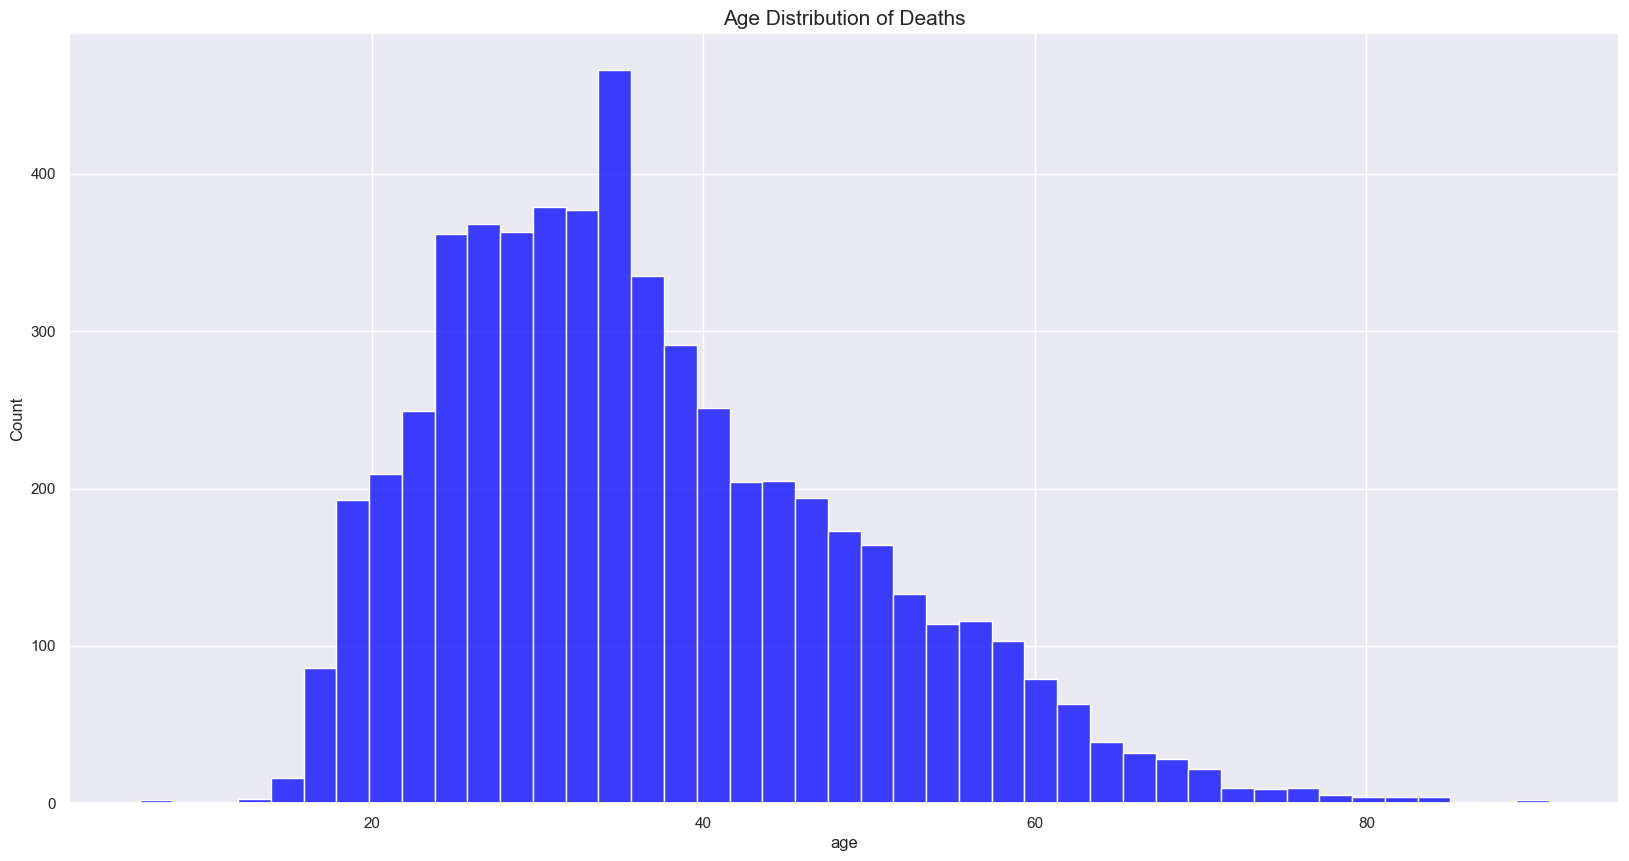

In [24]:
plt.figure(figsize=(20,10))
plt.title('Age Distribution of Deaths', fontsize=15)
sns.histplot(data=df, x='age', kde=False, color='blue')

In [25]:
# Out of interest our  oldest  victim is 91 years old and youngest is 6 year old.
# My data had 92year old victim but the person been removed when cleaning my data set.

max_age = df['age'].max()
min_age=df['age'].min()
print("Max age in the dataset is:", max_age)
print("Min age in the dataset is:", min_age)



Max age in the dataset is: 91.0
Min age in the dataset is: 6.0


The pie chart shows the gender distribution in the DataFrame, with each wedge of the pie representing the percentage of males and females in the dataset. The autopct parameter specifies that the percentage values should be displayed on each wedge of the pie chart with one decimal place. The plt.title() method sets the title of the pie chart to 'Gender Distribution'.

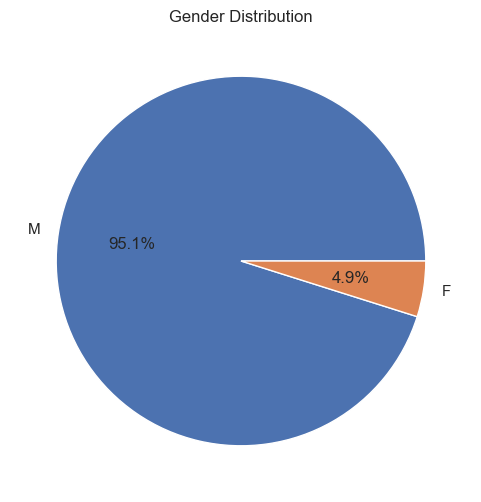

In [26]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

This line of code counts = df.groupby(['race', 'gender']).size() groups the rows of a Pandas DataFrame df by the values in the 'race' and 'gender' columns, and then calculates the size of each group.

Step by step code:

df is a Pandas DataFrame object that contains the data of interest.

groupby(['race', 'gender']) is a method of the DataFrame object that groups the rows of df by the values in the 'race' and 'gender' columns. This creates a new DataFrameGroupBy object that has the same columns as df, but with the rows grouped by the unique combinations of values in the 'race' and 'gender' columns.

.size() is a method of the DataFrameGroupBy object that calculates the size of each group in the groupby object. This returns a new Pandas Series object that contains the size of each group as its values, with the unique combinations of values in the 'race' and 'gender' columns as its index.


The purpose of counts_df = counts.reset_index(name='count') is to create a DataFrame with the counts and index values in separate columns, which will be useful for further analysis or visualization.


The results of  pivot_df DataFrame will have the unique 'gender' values as row indices, the unique 'race' values as column headers, and the cell values will be the counts from the original DataFrame corresponding to the 'gender' and 'race' values.



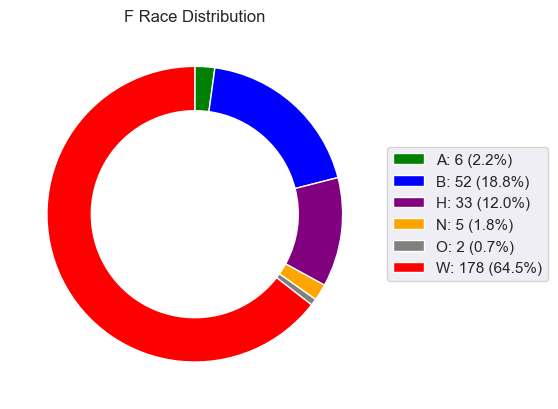

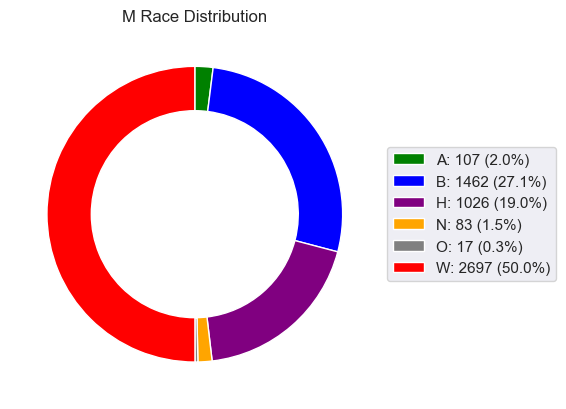

In [27]:
counts = df.groupby(['race', 'gender']).size()

# convert the series to a dataframe
counts_df = counts.reset_index(name='count')

# pivot the dataframe to create a table where columns are the race values, rows are the gender values, and values in the table represent the count of each race-gender combination.
pivot_df = counts_df.pivot(index='gender', columns='race', values='count')

# create a pie chart for each row of the pivot table.
colors = {'W': 'red', 'B': 'blue', 'A': 'green', 'H': 'purple', 'N': 'orange', 'O': 'gray'} # set colors for each race value.
labels = pivot_df.columns.values.tolist() # set labels for the slices based on the race values.
for gender in pivot_df.index:
    fig, ax = plt.subplots()
    wedges, _ = ax.pie(pivot_df.loc[gender], colors=[colors[race] for race in pivot_df.columns], labels=None, startangle=90, counterclock=False) # remove autopct to remove percentage values.
    plt.title(f'{gender} Race Distribution')
    plt.setp(wedges, width=0.3) # adjust the width of the wedges to make room for the legend.
    plt.subplots_adjust(right=0.75) # adjust the plot to make room for the labels.
    labels_legend = [f'{race}: {count} ({count/pivot_df.loc[gender].sum()*100:.1f}%)' for race, count in zip(labels, pivot_df.loc[gender])] # create list of labels for legend with percentage values.
    ax.legend(wedges, labels_legend, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# In conclusion of  my graphs , most of the people who were shot dead are younger than 40 years old.
# My personal thought is that educating kids from young age in school about committing crime and consquences that it brings, could have big influence to lower fatal police shootings in near future.
# That is one side of the coin, I want to show the dark side of our world which is racims ,which even people who should protect us , police officers do commit.

# Race 

# Racism is the biggest disease in the history of humankind and unfortunately,there is a difference in the number of fatal shootings with respect to each Race.

 I will first create a new dataframe that contains the number of yearly shootings for each race.

 The dataset consists of 6 different races which are:
 A-Asian, B-Black, H-Hispanic,N-Native_American ,  O-Other, W-White.

 Step by step :

Selects three columns ('race', 'year', and 'armed') from a pandas DataFrame called df using double square brackets [[ ]]

Groups the selected columns by 'race' and 'year' using the groupby() method.

Counts the number of occurrences for each combination of 'race' and 'year' using the count() method.

Resets the index of the resulting DataFrame to make the 'race' and 'year' columns regular columns again using the reset_index() method.



In [28]:
df_race = df[['race','year','armed']].groupby(['race','year']).count().reset_index()


The first line of code renames the column 'armed' in the df_race DataFrame to 'number_of_deaths' using the rename() method. The columns argument takes a dictionary where the keys represent the old column names and the values represent the new column names. The inplace=True argument ensures that the changes are made directly to the df_race DataFrame.

The second line of code uses the head() method to show the first few rows of the df_race DataFrame. This method is useful for quickly inspecting a DataFrame and verifying that the data looks as expected.

In [29]:
df_race.rename(columns={'armed':'number_of_deaths'}, inplace=True)
df_race.head()

,race,year,number_of_deaths
0,A,2015,17
1,A,2016,18
2,A,2017,14
3,A,2018,23
4,A,2019,24


Only the number of deaths do not tell me much because these races are not proportionately represented in terms of population. 
I will use the number of deaths per 1 million people as my baseline.

Line of code :df_pop = pd.DataFrame({'race':['W','B','A','H','N','O'],'population':[0.593, 0.136, 0.061, 0.189, 0.016, 0.029]}) creates a pandas DataFrame called df_pop with two columns named 'race' and 'population'.

'race' column contains categorical data that represents different racial groups in a given population, namely: White (W), Black (B), Asian (A), Hispanic (H), Native American (N), and Other (O).

The 'population' column contains numerical data that represents the proportion of each racial group in the given population, with values ranging from 0 to 1.

DataFrame df_pop is showing the distribution of different racial groups in  USA population based on their proportion.

In [30]:
df_pop = pd.DataFrame({'race':['W','B','A','H','N','O'],'population':[0.593, 0.136, 0.061, 0.189, 0.016, 0.029]})

I  have used the website https://www.census.gov/quickfacts/fact/table/USPopulation 
which gave me population estimates for July 1 2021 : 332,031,554

In [31]:
df_pop['population'] = df_pop['population']*332
df_pop

,race,population
0,W,196.876
1,B,45.152
2,A,20.252
3,H,62.748
4,N,5.312
5,O,9.628


1.Explanation of code : df_race = pd.merge(df_race, df_pop, on='race')

This line performs a merge operation between two pandas DataFrames df_race and df_pop based on the common column 'race'. It adds a new column 'population' to df_race with the proportion of each racial group in a given population.
    
2.Explanation of code : df_race['deaths_per_million'] = df_race['number_of_deaths'] / df_race['population']
    
This line creates a new column called 'deaths_per_million' in df_race. It is calculated by dividing the number of deaths in that racial group by its corresponding population (proportion multiplied by total population).

3.df_race.head()

This line displays the first few rows of the resulting DataFrame df_race after performing the merge and creating the new column. It allows me to visually inspect the data and check if the merge and calculation operations were performed correctly.

In [32]:
df_race = pd.merge(df_race, df_pop, on='race')
df_race['deaths_per_million'] = df_race['number_of_deaths'] / df_race['population']
df_race.head()

,race,year,number_of_deaths,population,deaths_per_million
0,A,2015,17,20.252,0.839423
1,A,2016,18,20.252,0.888801
2,A,2017,14,20.252,0.691290
3,A,2018,23,20.252,1.135690
4,A,2019,24,20.252,1.185068


sns.barplot(x='year', y='deaths_per_million', hue='race', data=df_race, palette=colors)

This line creates a barplot using seaborn (sns) with the following arguments:

x='year': The x-axis of the plot will display the year when the shooting occurred.

y='deaths_per_million': The y-axis of the plot will display the number of deaths per million people for each racial group.

hue='race': The bars will be color-coded based on the racial group using the race column in the DataFrame df_race.

data=df_race: The data source for the plot will be the DataFrame df_race.

palette=colors: The color palette for the bars will be the list of colors defined earlier in the colors variable.

The resulting plot will show the number of deaths per million people for each racial group, grouped by year, in a barplot where each bar represents a racial group and each color represents a year. The legend will show the color-code for each racial group.

<AxesSubplot: title={'center': 'Fatal Shootings by Police'}, xlabel='year', ylabel='deaths_per_million'>

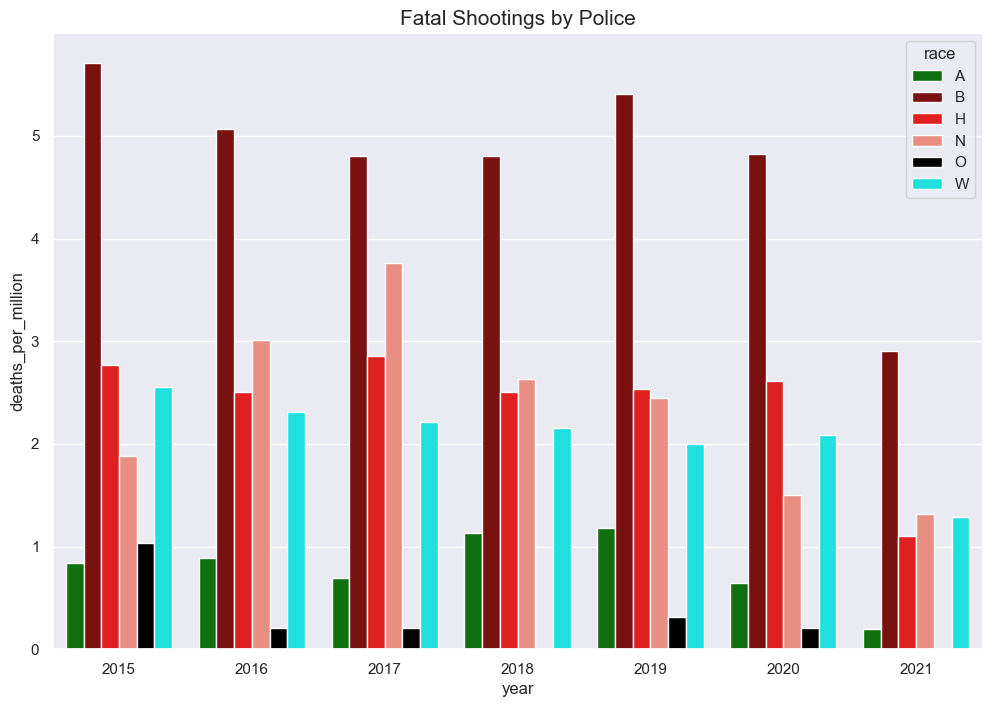

In [33]:
colors = ['green', 'darkred', 'red', 'salmon', 'black', 'cyan']

plt.figure(figsize=(12,8))
plt.title("Fatal Shootings by Police", fontsize=15)
sns.barplot(x='year', y='deaths_per_million', hue='race', data=df_race, palette=colors )

# Conclusion :
# The ratio of Fatal Shooting by Police for black people (B) is clearly higher than other races. 
# The native american (N) and other (O) have very low population so a more logical comparison would be among:
#  asian (A) , black (B),  hispanic (H),white (W) races.

# Any type of racism in the world shouldn't exist. Unfortunately, it is not the case in the world right now , but what we can  do is educate our children in a way that the word “racism” stops exist.